In [3]:
import tarfile

# Path to the CIFAR-10 tar.gz file
file_path = '/content/cifar-10-python.tar.gz'

# Extract the tar.gz file
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='/content/cifar-10-python')


In [4]:
import pickle
import numpy as np

# Define a function to unpickle the data files
def load_cifar10_batch(batch_path):
    with open(batch_path, 'rb') as f:
        data_dict = pickle.load(f, encoding='bytes')
    return data_dict

# Path to the extracted dataset directory
data_dir = '/content/cifar-10-python/cifar-10-batches-py/'

# Load all the training batches
train_data = []
train_labels = []
for i in range(1, 6):
    batch_path = f'{data_dir}data_batch_{i}'
    batch = load_cifar10_batch(batch_path)
    train_data.append(batch[b'data'])
    train_labels.append(batch[b'labels'])

# Concatenate all batches into single arrays
X_train = np.concatenate(train_data, axis=0)
y_train = np.concatenate(train_labels, axis=0)

# Load the test batch
test_batch_path = f'{data_dir}test_batch'
test_batch = load_cifar10_batch(test_batch_path)
X_test = test_batch[b'data']
y_test = test_batch[b'labels']

# Reshape the data to 32x32x3 images (CIFAR-10 images are 32x32 pixels with 3 color channels)
X_train = X_train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # Convert to (N, 32, 32, 3)
X_test = X_test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Normalize the images (scale pixel values to the range [0, 1])
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Display dataset shape
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")


Training data shape: (50000, 32, 32, 3), Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000,)


In [6]:
import pandas as pd
import numpy as np

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Map numerical labels to class names
label_names = [class_names[i] for i in y_train]

# Create DataFrame
df = pd.DataFrame({
    'Image Index': np.arange(len(y_train)),
    'Class Name': label_names
})

# Display first 10 rows
print(df.head(10))


   Image Index  Class Name
0            0        frog
1            1       truck
2            2       truck
3            3        deer
4            4  automobile
5            5  automobile
6            6        bird
7            7       horse
8            8        ship
9            9         cat


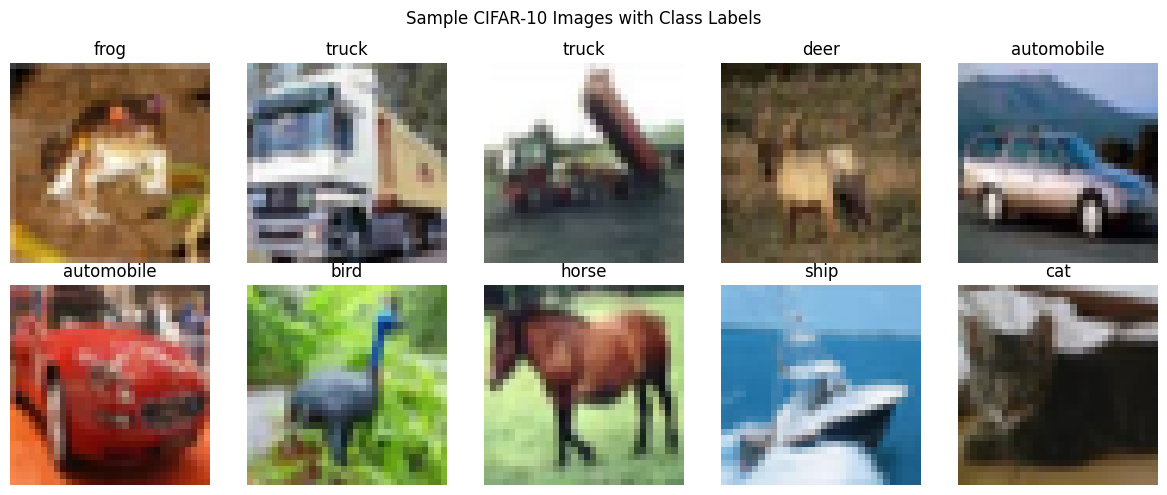

In [7]:
import matplotlib.pyplot as plt

# Display 10 sample images with their class names
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.suptitle("Sample CIFAR-10 Images with Class Labels")
plt.tight_layout()
plt.show()


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build  CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training  model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

# Evaluating the model based on the test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 45ms/step - accuracy: 0.3458 - loss: 1.7796 - val_accuracy: 0.5375 - val_loss: 1.2759
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.5786 - loss: 1.1909 - val_accuracy: 0.6204 - val_loss: 1.0733
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6450 - loss: 1.0073 - val_accuracy: 0.6391 - val_loss: 1.0228
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.6873 - loss: 0.8946 - val_accuracy: 0.6824 - val_loss: 0.9148
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.7174 - loss: 0.8183 - val_accuracy: 0.6832 - val_loss: 0.9092
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7300 - loss: 0.7611 - val_accuracy: 0.6985 - val_loss: 0.8809
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7502 - loss: 0.7119 - val_accuracy: 0.6957 - val_loss: 0.8795
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7679 -

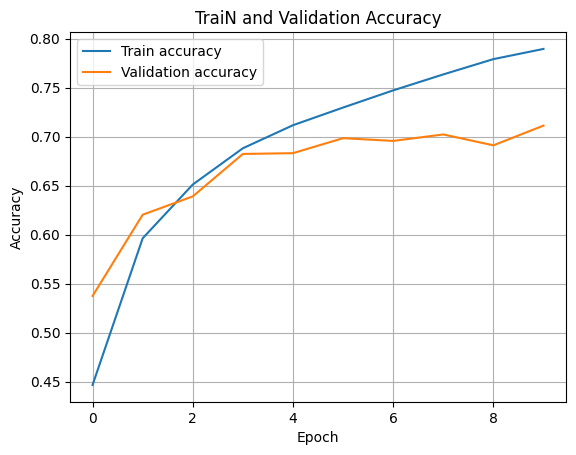

In [22]:
# Plot
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('TraiN and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Trained a Convolutional Neural Network (CNN) on the CIFAR-10 dataset, which includes 60,000 color images from ten different classes. During training, the model increased steadily over 10 epochs, beginning with a training accuracy of 34.58% and eventually reaching 79.25%. The related validation accuracy increased from 53.75% to 71.13%, suggesting that the model was learning efficiently and generalizing reasonably well to previously unseen data. The final test accuracy of 71.13% indicates that the model can properly classify more than 70% of the test photos. During training, a warning was displayed advocating the use of a 'Input()' layer at the beginning of the Sequential model rather than giving 'input_shape' directly to the first layer, which improves clarity and future compatibility.

To improve performance even more, consider using data augmentation (e.g., flipping, moving, and rotating images), regularization techniques such as dropout, or batch normalization to stabilize learning. Overall, your CNN performs well for a beginner-level model and serves as a solid foundation for future improvements.